<a href="https://colab.research.google.com/github/macapagithub/exaple-unsupervised-learning/blob/master/models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Models

In [1]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url_train_labels = 'https://raw.githubusercontent.com/macapagithub/exaple-unsupervised-learning/master/data/training_set_labels.csv'
url_test_features = 'https://raw.githubusercontent.com/macapagithub/exaple-unsupervised-learning/master/data/test_set_features.csv'
url_train_features = 'https://raw.githubusercontent.com/macapagithub/exaple-unsupervised-learning/master/data/training_set_features.csv'

In [3]:
test_features_df = pd.read_csv(url_test_features)
train_features_df = pd.read_csv(url_train_features)
train_labels_df = pd.read_csv(url_train_labels)

In [ ]:
# joined_df = train_features_df.set_index('respondent_id').join(train_labels_df.set_index('respondent_id'))
# print(joined_df.shape)
# joined_df.head(3)

In [4]:
from sklearn.cluster import KMeans
number_cluster = []
for i in range(1,13):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(train_labels_df)
    number_cluster.append(kmeans.inertia_)


In [5]:
number_cluster

[1587428143491.6765,
 396860789864.5689,
 176385139954.87854,
 99267363077.36874,
 63506424441.20435,
 44118776807.01297,
 32415331280.35958,
 24846066081.32406,
 19628281720.940277,
 15911453190.088142,
 13137357186.444147,
 11048571829.505201]

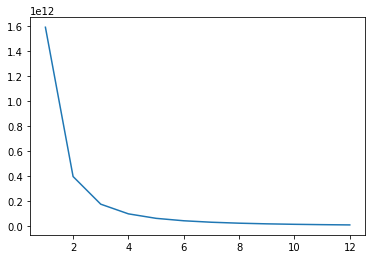

In [6]:
plt.plot(range(1,13), number_cluster)

In [11]:
features = []
for c in train_features_df.columns:
    t = str(train_features_df[c].dtype)
    if "int" in t or "float" in t:
        features.append(c)
features

['respondent_id',
 'h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_adults',
 'household_children']

In [10]:
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(train_features_df)
y_kmeans = kmeans.fit_predict(train_features_df)
y_kmeans

ValueError: ignored

In [8]:
train_features_df

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg


In [ ]:
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 500, 
#                 verbose = 1, n_init=10, random_state=28).fit(train_features_df)
# y_kmeans = kmeans.fit_predict(train_features_df)
# y_kmeans